# Aplicando o modelo ARIMA 

 - ARIMA_MODEL

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

- importando os dados dos crimes sexuais

In [3]:
crimes_sexuais = pd.read_csv('crimes_sexuais.csv')

In [4]:
crimes_sexuais.head()

,data_da_ocorrencia,crimes_sexuais
0,2014-01-01,43
1,2014-01-02,5
2,2014-01-03,3
3,2014-01-04,3
4,2014-01-05,8


 - convertendo as coluna data para Datetime

In [5]:
crimes_sexuais['data_da_ocorrencia'] = pd.to_datetime(crimes_sexuais['data_da_ocorrencia'])

 - Selecionando apenas os delitos concluídos nos anos 2014 e 2015

In [6]:
crimes_sexuais = crimes_sexuais.query(' data_da_ocorrencia >= "2014-01-01"')

In [7]:
crimes_sexuais['data_da_ocorrencia'].dt.year.value_counts()

2015    365
2014    365
Name: data_da_ocorrencia, dtype: int64

 - Definindo a data como índice

In [8]:
crimes_sexuais = crimes_sexuais.set_index('data_da_ocorrencia')

 - Graficando "crimes_sexuais"

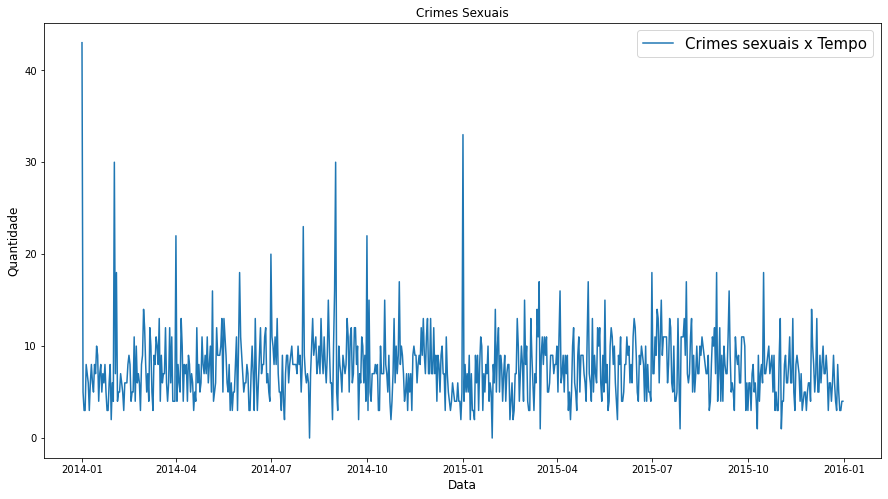

In [9]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

In [10]:
t_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].index.values
t_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].index.values
X_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].values
X_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].values

- Aplicando o modelo auto regressivo

In [11]:
from statsmodels.tsa.api import ARIMA

In [71]:
modelo = ARIMA(X_treino,order=(2,0,1))
resultado = modelo.fit()

 - Coeficientes

In [72]:
print('Coefficients: %s' % resultado.params)

Coefficients: [ 7.70638837  0.80182031 -0.04564016 -0.7786746 ]


 - Fazendo as predições

In [73]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

 - Calculando erros

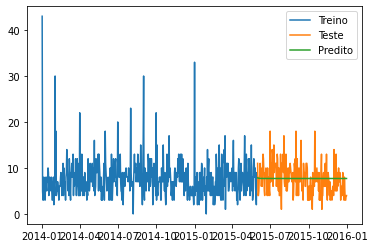

In [74]:
plt.plot(t_treino,X_treino,label='Treino')
plt.plot(t_teste,X_teste,label='Teste')
plt.plot(t_teste,X_pred,label='Predito')
plt.legend()

 - calculando erros

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
MSE = mean_squared_error(X_teste,X_pred)

In [18]:
RMSE = np.sqrt(MSE)

In [19]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.28


 - Grid search

In [35]:
best = 1e6
i_best = 0
j_best = 0
k_best = 0

for i in range(1,4):
    for j in range(0,3):
        for k in range(0,2):
            modelo = ARIMA(X_treino, order=(i,k,j))
            resultado = modelo.fit(start_ar_lags = 6)
            AIC = resultado.aic
            X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)
            MSE = mean_squared_error(X_teste,X_pred)
            RMSE = np.sqrt(MSE)
            if(RMSE<best):
                best = RMSE
                i_best = i
                j_best = j
                k_best = k
            print("i = {} j = {}, k={},  AIC = {:0.2f} RMSE = {:0.2f}".format(i,j,k,AIC,RMSE))
        
print("Melhor i = {}".format(i_best))
print("Melhor j = {}".format(j_best))
print("Melhor k = {}".format(k_best))

i = 1 j = 0, k=0,  AIC = 2924.38 RMSE = 3.28
i = 1 j = 0, k=1,  AIC = 3097.80 RMSE = 8.31
i = 1 j = 1, k=0,  AIC = 2926.37 RMSE = 3.28
i = 1 j = 1, k=1,  AIC = 2927.79 RMSE = 8.28
i = 1 j = 2, k=0,  AIC = 2925.19 RMSE = 3.27
i = 1 j = 2, k=1,  AIC = 2929.78 RMSE = 8.28
i = 2 j = 0, k=0,  AIC = 2926.31 RMSE = 3.28
i = 2 j = 0, k=1,  AIC = 3074.86 RMSE = 8.31
i = 2 j = 1, k=0,  AIC = 2925.78 RMSE = 3.27
i = 2 j = 1, k=1,  AIC = 2929.69 RMSE = 8.28
i = 2 j = 2, k=0,  AIC = 2923.99 RMSE = 3.27
i = 2 j = 2, k=1,  AIC = 2929.12 RMSE = 8.28
i = 3 j = 0, k=0,  AIC = 2920.80 RMSE = 3.27
i = 3 j = 0, k=1,  AIC = 3027.67 RMSE = 8.31
i = 3 j = 1, k=0,  AIC = 2922.36 RMSE = 3.27
i = 3 j = 1, k=1,  AIC = 2924.45 RMSE = 8.27
i = 3 j = 2, k=0,  AIC = 2923.61 RMSE = 3.27
i = 3 j = 2, k=1,  AIC = 2925.98 RMSE = 8.27
Melhor i = 3
Melhor j = 2
Melhor k = 0


 - Melhor modelo (3,2,0)

 - Aplicando o melhor modelo

In [77]:
modelo = ARIMA(X_treino,order=(3,2,0))
resultado = modelo.fit()
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

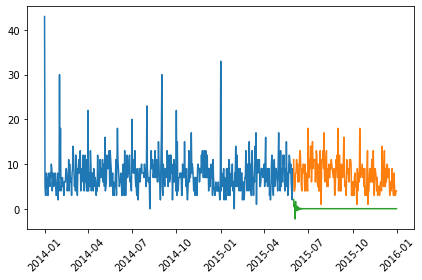

In [78]:
plt.plot(t_treino,X_treino,label='Treino');
plt.plot(t_teste,X_teste,label='Teste');
plt.plot(t_teste,X_pred,label='Predito');
plt.xticks(rotation=45);
plt.tight_layout();